[1] 모듈 로딩 및 데이터 준비

In [1200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 모듈 로딩 
import torch # torch 기본 모듈로 텐서 기본 함수들 
import torch.nn.functional as F # pytorch 인공 신경망 관련 함수들 
from sklearn.datasets import fetch_openml
import numpy as np
import torch
import torch.nn as nn # linear Regression 기능의 클래스 Linear
import torch.nn.functional as F # 손실함수를 위함
import torch.optim as optim # 최적화를 위함
from torch.utils.data import Dataset,DataLoader


In [1201]:
# !conda install pytables -y

In [1202]:
df = pd.read_hdf('./total_skip3.h5', key='total', mode = 'r')

HDF5ExtError: HDF5 error back trace

  File "C:\b\abs_e4nt8ttmb0\croot\hdf5_1686163951797\work\src\H5Dio.c", line 179, in H5Dread
    can't read data
  File "C:\b\abs_e4nt8ttmb0\croot\hdf5_1686163951797\work\src\H5VLcallback.c", line 2011, in H5VL_dataset_read
    dataset read failed
  File "C:\b\abs_e4nt8ttmb0\croot\hdf5_1686163951797\work\src\H5VLcallback.c", line 1978, in H5VL__dataset_read
    dataset read failed
  File "C:\b\abs_e4nt8ttmb0\croot\hdf5_1686163951797\work\src\H5VLnative_dataset.c", line 166, in H5VL__native_dataset_read
    can't read data
  File "C:\b\abs_e4nt8ttmb0\croot\hdf5_1686163951797\work\src\H5Dio.c", line 545, in H5D__read
    can't read data
  File "C:\b\abs_e4nt8ttmb0\croot\hdf5_1686163951797\work\src\H5Dchunk.c", line 2572, in H5D__chunk_read
    chunked read failed
  File "C:\b\abs_e4nt8ttmb0\croot\hdf5_1686163951797\work\src\H5Dscatgath.c", line 527, in H5D__scatgath_read
    datatype conversion failed
  File "C:\b\abs_e4nt8ttmb0\croot\hdf5_1686163951797\work\src\H5T.c", line 5458, in H5T_convert
    datatype conversion failed
  File "C:\b\abs_e4nt8ttmb0\croot\hdf5_1686163951797\work\src\H5Tconv.c", line 3403, in H5T__conv_vlen
    can't write VL data
  File "C:\b\abs_e4nt8ttmb0\croot\hdf5_1686163951797\work\src\H5Tvlen.c", line 569, in H5T__vlen_mem_seq_write
    memory allocation failed for VL data

End of HDF5 error back trace

VLArray._read_array: Problems reading the array data.

In [ ]:
df.tail()

,rank,summoner.id,summoner.summoner_id,summoner.acct_id,summoner.puuid,summoner.game_name,summoner.tagline,summoner.name,summoner.internal_name,summoner.profile_image_url,summoner.level,summoner.updated_at,summoner.league_stats,summoner.most_champions.game_type,summoner.most_champions.season_id,summoner.most_champions.play,summoner.most_champions.win,summoner.most_champions.lose,summoner.most_champions.champion_stats,summoner.most_champions
88123,2643196,91454206,J4RYs-z7ApnlA9ldcQNG-HV1u0ymGIQFtzFCKO26ARDc8g...,jJuaao2qRv2UwZFhgTKsmrTdbPpY75B1BMmO-Srfg8r62n...,Wh-WIDJy7mWk9f-lPjjA8zuSkS_X1CyD2BTJYEBOs5AUS2...,정하지니,5940,우면동돼지하마,우면동돼지하마,https://opgg-static.akamaized.net/meta/images/...,55,2024-03-03T14:32:00+09:00,"[{'queue_info': {'id': 4, 'queue_translate': '...",RANKED,25.0,58.0,17.0,41.0,"[{'id': 517, 'play': 16, 'win': 3, 'lose': 13,...",NaN
88124,2643197,91451092,H9vqL8iYgjZEDqmoWPa60CSMbCvFv963fF4RQaMYUoy6d7...,7luZYAf8AVdyeOArM1LUmxqgyATsvWYna8v4n3fg13hLH5...,uiWogpJe28zwrrV18J5mAL-hgXm08nm-aqzh2trOI0UtSM...,크롱폼미쳤다,KR1,크롱폼미쳤다,크롱폼미쳤다,https://opgg-static.akamaized.net/meta/images/...,43,2024-03-18T01:10:52+09:00,"[{'queue_info': {'id': 4, 'queue_translate': '...",RANKED,25.0,24.0,11.0,13.0,"[{'id': 99, 'play': 8, 'win': 2, 'lose': 6, 'k...",NaN
88125,2643198,91451001,xAuu7qwumrumRE8Hv4ddYAmk09mjGAybt6ofJeqtvudln5...,o7KMArzF792bNzDAsLEsnp7WpDzD2EHEIabiKzPYNyfzY9...,8jJd7rgB5oLTI1pzN4Ab3GUK2mQpmeePfh7xrrP-wBt_OR...,백목이버섯,4989,춘자자남편,춘자자남편,https://opgg-static.akamaized.net/meta/images/...,42,2024-03-09T21:03:38+09:00,"[{'queue_info': {'id': 4, 'queue_translate': '...",RANKED,25.0,43.0,5.0,38.0,"[{'id': 99, 'play': 7, 'win': 1, 'lose': 6, 'k...",NaN
88126,2643199,91447967,AtSikjUQ69-1y9aDoycydb3nlCctxFNf2dedTGFwtH_Rvp...,7Lhd9MhJZz1bgwoXNP2D5qfCw-6YovWccXq4v0oCe007Zt...,6a2SRc3xl4nHV03ESAkfmSsAor2kc7oT_0pSIojyoADTXA...,아이언길들이기,BMKKK,올려놓으면밴함,올려놓으면밴함,https://opgg-static.akamaized.net/meta/images/...,54,2024-03-15T01:01:43+09:00,"[{'queue_info': {'id': 4, 'queue_translate': '...",RANKED,25.0,57.0,16.0,41.0,"[{'id': 350, 'play': 43, 'win': 8, 'lose': 35,...",NaN
88127,2643200,91447112,iuqIzAfi6bjxDkhyf9Unz1a1vjQvhJWjC9wfqqBrvmZk0s...,LrPu5w9Gftd4iujuV85mGq8Evgf49bBaACcz7qHXedqk4s...,0j5dj8-Tln477pm-QGBUciZEvS3N11aEw1P12LMStua5DE...,잘써라,5555,널 기,널기,https://opgg-static.akamaized.net/meta/images/...,84,2024-02-29T17:46:26+09:00,"[{'queue_info': {'id': 4, 'queue_translate': '...",RANKED,25.0,27.0,3.0,24.0,"[{'id': 106, 'play': 6, 'win': 1, 'lose': 5, '...",NaN


In [ ]:
df.rank

<bound method NDFrame.rank of           rank  summoner.id  \
0          101     11410734   
1          102     22071749   
2          103     88211005   
3          104     90642482   
4          105     90213513   
...        ...          ...   
88123  2643196     91454206   
88124  2643197     91451092   
88125  2643198     91451001   
88126  2643199     91447967   
88127  2643200     91447112   

                                    summoner.summoner_id  \
0        p7JnQWGP5hN9cXmQvkaHJ03Tu8xM7rUJnNam6-gVOG6iPGA   
1        UvMMVnACbaYBOl51M30h6fSnZ81B-bluf5CoYTu2MDTnAwA   
2      J7t8iYgMwyLVwv0r11xXp6lh9ZdxQSEmOwW8f5-JuuwRjc...   
3      A3v6axyaOfKjlF0VQRcZ2kzoY0hTuip0UkYSaE0k4MU40z...   
4      c7fW2iOVYJEh5uWwetFmCOjIvj7fJyLTYkmJeqgT4JMQOx...   
...                                                  ...   
88123  J4RYs-z7ApnlA9ldcQNG-HV1u0ymGIQFtzFCKO26ARDc8g...   
88124  H9vqL8iYgjZEDqmoWPa60CSMbCvFv963fF4RQaMYUoy6d7...   
88125  xAuu7qwumrumRE8Hv4ddYAmk09mjGAybt6ofJeqtvudln5... 

In [ ]:
df=df[['rank','summoner.game_name','summoner.level','summoner.updated_at','summoner.league_stats','summoner.most_champions.game_type','summoner.most_champions.play','summoner.most_champions.win','summoner.most_champions.lose','summoner.most_champions.champion_stats']]

In [ ]:
df.head(5)

,rank,summoner.game_name,summoner.level,summoner.updated_at,summoner.league_stats,summoner.most_champions.game_type,summoner.most_champions.play,summoner.most_champions.win,summoner.most_champions.lose,summoner.most_champions.champion_stats
0,101,길가다가까까사달라고조르는이도윤,178,2024-03-18T15:44:29+09:00,"[{'queue_info': {'id': 4, 'queue_translate': '...",RANKED,265.0,157.0,108.0,"[{'id': 910, 'play': 32, 'win': 20, 'lose': 12..."
1,102,Deft,828,2024-03-19T17:00:02+09:00,"[{'queue_info': {'id': 4, 'queue_translate': '...",RANKED,263.0,153.0,110.0,"[{'id': 81, 'play': 39, 'win': 26, 'lose': 13,..."
2,103,蚂蚁的一天,324,2024-03-19T11:35:10+09:00,"[{'queue_info': {'id': 4, 'queue_translate': '...",RANKED,268.0,157.0,111.0,"[{'id': 429, 'play': 30, 'win': 17, 'lose': 13..."
3,104,金魚花火,278,2024-03-19T10:33:58+09:00,"[{'queue_info': {'id': 4, 'queue_translate': '...",RANKED,336.0,193.0,143.0,"[{'id': 245, 'play': 203, 'win': 122, 'lose': ..."
4,105,서예지,100,2024-03-18T04:45:51+09:00,"[{'queue_info': {'id': 4, 'queue_translate': '...",RANKED,127.0,88.0,39.0,"[{'id': 901, 'play': 30, 'win': 21, 'lose': 9,..."


In [ ]:
# summoner_most_champions.champion_stats 내부에 있는 딕셔너리 분할
from pandas import json_normalize

leaguestats=pd.json_normalize(df['summoner.league_stats'])


In [ ]:
leaguestats0=pd.json_normalize(leaguestats[0])

In [ ]:
leaguestats0

,win,lose,is_hot_streak,is_fresh_blood,is_veteran,is_inactive,series,updated_at,queue_info.id,queue_info.queue_translate,queue_info.game_type,tier_info.tier,tier_info.division,tier_info.lp,tier_info.level,tier_info.tier_image_url,tier_info.border_image_url
0,157,109,False,False,True,False,None,2024-03-19T17:09:44+09:00,4,Ranked Solo/Duo,SOLORANKED,CHALLENGER,1,1030,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
1,153,110,False,False,True,False,None,2024-03-19T17:09:44+09:00,4,Ranked Solo/Duo,SOLORANKED,CHALLENGER,1,1027,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
2,157,111,False,False,False,False,None,2024-03-19T17:09:44+09:00,4,Ranked Solo/Duo,SOLORANKED,CHALLENGER,1,1025,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
3,193,144,False,False,False,False,None,2024-03-19T17:09:44+09:00,4,Ranked Solo/Duo,SOLORANKED,CHALLENGER,1,1024,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
4,88,39,False,False,False,False,None,2024-03-19T17:09:44+09:00,4,Ranked Solo/Duo,SOLORANKED,CHALLENGER,1,1023,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88123,17,45,False,False,False,False,None,2024-03-19T14:09:30+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
88124,12,26,False,False,False,False,None,2024-03-19T06:07:32+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
88125,6,45,False,False,False,False,None,2024-03-19T15:26:19+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
88126,14,43,False,False,False,False,None,2024-03-19T18:53:51+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...


In [ ]:
fuckingtrashes=((leaguestats0['tier_info.tier']=='IRON') | (leaguestats0['tier_info.tier']=='Bronze')) & (leaguestats0['queue_info.game_type']=='SOLORANKED')
leaguestats1=leaguestats0[fuckingtrashes]

In [ ]:
leaguestats1


,win,lose,is_hot_streak,is_fresh_blood,is_veteran,is_inactive,series,updated_at,queue_info.id,queue_info.queue_translate,queue_info.game_type,tier_info.tier,tier_info.division,tier_info.lp,tier_info.level,tier_info.tier_image_url,tier_info.border_image_url
81628,125,141,False,True,False,False,None,2024-03-19T19:46:00+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,1,92,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
81629,3,2,False,False,False,False,None,2024-03-19T20:10:36+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,1,92,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
81630,9,9,False,False,False,False,None,2024-03-19T16:43:29+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,1,92,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
81631,24,37,False,True,False,False,None,2024-03-19T20:08:47+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,1,92,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
81632,5,4,False,False,False,False,None,2024-03-19T16:06:28+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,1,92,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88123,17,45,False,False,False,False,None,2024-03-19T14:09:30+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
88124,12,26,False,False,False,False,None,2024-03-19T06:07:32+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
88125,6,45,False,False,False,False,None,2024-03-19T15:26:19+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...
88126,14,43,False,False,False,False,None,2024-03-19T18:53:51+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0,None,https://opgg-static.akamaized.net/images/medal...,https://opgg-static.akamaized.net/images/borde...


In [ ]:
leaguestats1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 81628 to 88127
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   win                         6500 non-null   int64 
 1   lose                        6500 non-null   int64 
 2   is_hot_streak               6500 non-null   bool  
 3   is_fresh_blood              6500 non-null   bool  
 4   is_veteran                  6500 non-null   bool  
 5   is_inactive                 6500 non-null   bool  
 6   series                      0 non-null      object
 7   updated_at                  6500 non-null   object
 8   queue_info.id               6500 non-null   int64 
 9   queue_info.queue_translate  6500 non-null   object
 10  queue_info.game_type        6500 non-null   object
 11  tier_info.tier              6500 non-null   object
 12  tier_info.division          6500 non-null   int64 
 13  tier_info.lp                6500 non-null   int6

In [ ]:
# 필요없는 열들 삭제

In [ ]:
leaguestats1.drop(columns=['series'], inplace=True)

C:\Users\kdp\AppData\Local\Temp\ipykernel_15988\4130289350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaguestats1.drop(columns=['series'], inplace=True)


In [ ]:
leaguestats1.drop(columns=['tier_info.level'], inplace=True)

C:\Users\kdp\AppData\Local\Temp\ipykernel_15988\2289127506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaguestats1.drop(columns=['tier_info.level'], inplace=True)


In [ ]:
leaguestats1.drop(columns=['tier_info.tier_image_url'], inplace=True)
leaguestats1.drop(columns=['tier_info.border_image_url'], inplace=True)

C:\Users\kdp\AppData\Local\Temp\ipykernel_15988\2834798025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaguestats1.drop(columns=['tier_info.tier_image_url'], inplace=True)
C:\Users\kdp\AppData\Local\Temp\ipykernel_15988\2834798025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaguestats1.drop(columns=['tier_info.border_image_url'], inplace=True)


In [ ]:
leaguestats1

,win,lose,is_hot_streak,is_fresh_blood,is_veteran,is_inactive,updated_at,queue_info.id,queue_info.queue_translate,queue_info.game_type,tier_info.tier,tier_info.division,tier_info.lp
81628,125,141,False,True,False,False,2024-03-19T19:46:00+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,1,92
81629,3,2,False,False,False,False,2024-03-19T20:10:36+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,1,92
81630,9,9,False,False,False,False,2024-03-19T16:43:29+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,1,92
81631,24,37,False,True,False,False,2024-03-19T20:08:47+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,1,92
81632,5,4,False,False,False,False,2024-03-19T16:06:28+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,1,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88123,17,45,False,False,False,False,2024-03-19T14:09:30+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0
88124,12,26,False,False,False,False,2024-03-19T06:07:32+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0
88125,6,45,False,False,False,False,2024-03-19T15:26:19+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0
88126,14,43,False,False,False,False,2024-03-19T18:53:51+09:00,4,Ranked Solo/Duo,SOLORANKED,IRON,4,0


In [ ]:
leaguestats1=leaguestats1[2:]

In [ ]:
#leaguestas1의 파일 정보 보기
leaguestats1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6498 entries, 81630 to 88127
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   win                         6498 non-null   int64 
 1   lose                        6498 non-null   int64 
 2   is_hot_streak               6498 non-null   bool  
 3   is_fresh_blood              6498 non-null   bool  
 4   is_veteran                  6498 non-null   bool  
 5   is_inactive                 6498 non-null   bool  
 6   updated_at                  6498 non-null   object
 7   queue_info.id               6498 non-null   int64 
 8   queue_info.queue_translate  6498 non-null   object
 9   queue_info.game_type        6498 non-null   object
 10  tier_info.tier              6498 non-null   object
 11  tier_info.division          6498 non-null   int64 
 12  tier_info.lp                6498 non-null   int64 
dtypes: bool(4), int64(5), object(4)
memory usage: 53

In [ ]:
champ=pd.json_normalize(df['summoner.most_champions.champion_stats'])


In [ ]:
champ

,0,1,2
0,"{'id': 910, 'play': 32, 'win': 20, 'lose': 12,...","{'id': 18, 'play': 27, 'win': 16, 'lose': 11, ...","{'id': 518, 'play': 24, 'win': 18, 'lose': 6, ..."
1,"{'id': 81, 'play': 39, 'win': 26, 'lose': 13, ...","{'id': 236, 'play': 38, 'win': 16, 'lose': 22,...","{'id': 145, 'play': 23, 'win': 16, 'lose': 7, ..."
2,"{'id': 429, 'play': 30, 'win': 17, 'lose': 13,...","{'id': 235, 'play': 30, 'win': 14, 'lose': 16,...","{'id': 901, 'play': 28, 'win': 17, 'lose': 11,..."
3,"{'id': 245, 'play': 203, 'win': 122, 'lose': 8...","{'id': 777, 'play': 44, 'win': 28, 'lose': 16,...","{'id': 84, 'play': 29, 'win': 16, 'lose': 13, ..."
4,"{'id': 901, 'play': 30, 'win': 21, 'lose': 9, ...","{'id': 81, 'play': 18, 'win': 14, 'lose': 4, '...","{'id': 221, 'play': 17, 'win': 13, 'lose': 4, ..."
...,...,...,...
88123,"{'id': 517, 'play': 16, 'win': 3, 'lose': 13, ...","{'id': 24, 'play': 8, 'win': 5, 'lose': 3, 'ki...","{'id': 68, 'play': 4, 'win': 1, 'lose': 3, 'ki..."
88124,"{'id': 99, 'play': 8, 'win': 2, 'lose': 6, 'ki...","{'id': 17, 'play': 7, 'win': 6, 'lose': 1, 'ki...","{'id': 117, 'play': 6, 'win': 2, 'lose': 4, 'k..."
88125,"{'id': 99, 'play': 7, 'win': 1, 'lose': 6, 'ki...","{'id': 777, 'play': 6, 'win': 1, 'lose': 5, 'k...","{'id': 157, 'play': 5, 'win': 1, 'lose': 4, 'k..."
88126,"{'id': 350, 'play': 43, 'win': 8, 'lose': 35, ...","{'id': 64, 'play': 3, 'win': 1, 'lose': 2, 'ki...","{'id': 63, 'play': 2, 'win': 1, 'lose': 1, 'ki..."


In [ ]:
firstchamp=pd.json_normalize(champ[0])

In [ ]:
firstchamp=firstchamp.drop(columns=['win','lose'])

In [ ]:
firstchamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88128 entries, 0 to 88127
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  85486 non-null  float64
 1   play                                85486 non-null  float64
 2   kill                                85486 non-null  float64
 3   death                               85486 non-null  float64
 4   assist                              85486 non-null  float64
 5   gold_earned                         85486 non-null  float64
 6   minion_kill                         85486 non-null  float64
 7   turret_kill                         85486 non-null  float64
 8   neutral_minion_kill                 85486 non-null  float64
 9   damage_dealt                        85486 non-null  float64
 10  damage_taken                        85486 non-null  float64
 11  physical_damage_dealt               85486

In [ ]:
#firstchamp 결측치
firstchamp.dropna(how='any',inplace=True)

In [ ]:
firstchamp.isna().sum()

id                                    0
play                                  0
kill                                  0
death                                 0
assist                                0
gold_earned                           0
minion_kill                           0
turret_kill                           0
neutral_minion_kill                   0
damage_dealt                          0
damage_taken                          0
physical_damage_dealt                 0
magic_damage_dealt                    0
most_kill                             0
max_kill                              0
max_death                             0
double_kill                           0
triple_kill                           0
quadra_kill                           0
penta_kill                            0
game_length_second                    0
inhibitor_kills                       0
sight_wards_bought_in_game            0
vision_wards_bought_in_game           0
vision_score                          0


In [ ]:
leaguestats0=leaguestats0[['win','lose','is_hot_streak','is_fresh_blood','is_veteran','is_inactive','queue_info.game_type','tier_info.tier','tier_info.division','tier_info.lp']]


In [ ]:
champstats=pd.concat([leaguestats0,firstchamp],axis=1)

In [ ]:
champstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88128 entries, 0 to 88127
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   win                                 88128 non-null  int64  
 1   lose                                88128 non-null  int64  
 2   is_hot_streak                       88128 non-null  bool   
 3   is_fresh_blood                      88128 non-null  bool   
 4   is_veteran                          88128 non-null  bool   
 5   is_inactive                         88128 non-null  bool   
 6   queue_info.game_type                88128 non-null  object 
 7   tier_info.tier                      88128 non-null  object 
 8   tier_info.division                  88128 non-null  int64  
 9   tier_info.lp                        88128 non-null  int64  
 10  id                                  85486 non-null  float64
 11  play                                85486

In [ ]:
champstats

,win,lose,is_hot_streak,is_fresh_blood,is_veteran,is_inactive,queue_info.game_type,tier_info.tier,tier_info.division,tier_info.lp,...,physical_damage_taken,damage_dealt_to_champions,physical_damage_dealt_to_champions,magic_damage_dealt_to_champions,damage_dealt_to_objectives,damage_dealt_to_turrets,damage_self_mitigated,max_largest_multi_kill,max_largest_critical_strike,max_largest_killing_spree
0,157,109,False,False,True,False,SOLORANKED,CHALLENGER,1,1030,...,197501.0,667921.0,42138.0,619908.0,193124.0,116767.0,219630.0,3.0,0.0,13.0
1,153,110,False,False,True,False,SOLORANKED,CHALLENGER,1,1027,...,452384.0,992302.0,666668.0,303279.0,450607.0,179910.0,371547.0,3.0,882.0,9.0
2,157,111,False,False,False,False,SOLORANKED,CHALLENGER,1,1025,...,397033.0,689178.0,572446.0,92299.0,427839.0,168727.0,375366.0,3.0,769.0,9.0
3,193,144,False,False,False,False,SOLORANKED,CHALLENGER,1,1024,...,2256956.0,3806399.0,426601.0,3323641.0,2009725.0,958229.0,2832136.0,4.0,0.0,28.0
4,88,39,False,False,False,False,SOLORANKED,CHALLENGER,1,1023,...,293294.0,677737.0,493381.0,111519.0,221085.0,83144.0,320106.0,4.0,1425.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88123,17,45,False,False,False,False,SOLORANKED,IRON,4,0,...,290604.0,224723.0,4893.0,216493.0,60305.0,14199.0,233723.0,2.0,0.0,4.0
88124,12,26,False,False,False,False,SOLORANKED,IRON,4,0,...,69802.0,75406.0,2453.0,71647.0,19713.0,10955.0,50679.0,2.0,0.0,2.0
88125,6,45,False,False,False,False,SOLORANKED,IRON,4,0,...,47282.0,65745.0,6224.0,58223.0,5629.0,2863.0,51958.0,1.0,0.0,4.0
88126,14,43,False,False,False,False,SOLORANKED,IRON,4,0,...,143228.0,54054.0,8719.0,34029.0,28761.0,10243.0,168896.0,1.0,545.0,2.0


In [ ]:
champstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88128 entries, 0 to 88127
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   win                                 88128 non-null  int64  
 1   lose                                88128 non-null  int64  
 2   is_hot_streak                       88128 non-null  bool   
 3   is_fresh_blood                      88128 non-null  bool   
 4   is_veteran                          88128 non-null  bool   
 5   is_inactive                         88128 non-null  bool   
 6   queue_info.game_type                88128 non-null  object 
 7   tier_info.tier                      88128 non-null  object 
 8   tier_info.division                  88128 non-null  int64  
 9   tier_info.lp                        88128 non-null  int64  
 10  id                                  85486 non-null  float64
 11  play                                85486

In [ ]:
#중복값
champstats.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88123    False
88124    False
88125    False
88126    False
88127    False
Length: 88128, dtype: bool

In [ ]:
#결측치
champstats.isna().sum()

win                                      0
lose                                     0
is_hot_streak                            0
is_fresh_blood                           0
is_veteran                               0
is_inactive                              0
queue_info.game_type                     0
tier_info.tier                           0
tier_info.division                       0
tier_info.lp                             0
id                                    2642
play                                  2642
kill                                  2642
death                                 2642
assist                                2642
gold_earned                           2642
minion_kill                           2642
turret_kill                           2642
neutral_minion_kill                   2642
damage_dealt                          2642
damage_taken                          2642
physical_damage_dealt                 2642
magic_damage_dealt                    2642
most_kill  

In [ ]:
champstats.dropna(inplace=True)

In [ ]:
champstats.isna().sum()

win                                   0
lose                                  0
is_hot_streak                         0
is_fresh_blood                        0
is_veteran                            0
is_inactive                           0
queue_info.game_type                  0
tier_info.tier                        0
tier_info.division                    0
tier_info.lp                          0
id                                    0
play                                  0
kill                                  0
death                                 0
assist                                0
gold_earned                           0
minion_kill                           0
turret_kill                           0
neutral_minion_kill                   0
damage_dealt                          0
damage_taken                          0
physical_damage_dealt                 0
magic_damage_dealt                    0
most_kill                             0
max_kill                              0


In [ ]:
champstats

,win,lose,is_hot_streak,is_fresh_blood,is_veteran,is_inactive,queue_info.game_type,tier_info.tier,tier_info.division,tier_info.lp,...,physical_damage_taken,damage_dealt_to_champions,physical_damage_dealt_to_champions,magic_damage_dealt_to_champions,damage_dealt_to_objectives,damage_dealt_to_turrets,damage_self_mitigated,max_largest_multi_kill,max_largest_critical_strike,max_largest_killing_spree
0,157,109,False,False,True,False,SOLORANKED,CHALLENGER,1,1030,...,197501.0,667921.0,42138.0,619908.0,193124.0,116767.0,219630.0,3.0,0.0,13.0
1,153,110,False,False,True,False,SOLORANKED,CHALLENGER,1,1027,...,452384.0,992302.0,666668.0,303279.0,450607.0,179910.0,371547.0,3.0,882.0,9.0
2,157,111,False,False,False,False,SOLORANKED,CHALLENGER,1,1025,...,397033.0,689178.0,572446.0,92299.0,427839.0,168727.0,375366.0,3.0,769.0,9.0
3,193,144,False,False,False,False,SOLORANKED,CHALLENGER,1,1024,...,2256956.0,3806399.0,426601.0,3323641.0,2009725.0,958229.0,2832136.0,4.0,0.0,28.0
4,88,39,False,False,False,False,SOLORANKED,CHALLENGER,1,1023,...,293294.0,677737.0,493381.0,111519.0,221085.0,83144.0,320106.0,4.0,1425.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88123,17,45,False,False,False,False,SOLORANKED,IRON,4,0,...,290604.0,224723.0,4893.0,216493.0,60305.0,14199.0,233723.0,2.0,0.0,4.0
88124,12,26,False,False,False,False,SOLORANKED,IRON,4,0,...,69802.0,75406.0,2453.0,71647.0,19713.0,10955.0,50679.0,2.0,0.0,2.0
88125,6,45,False,False,False,False,SOLORANKED,IRON,4,0,...,47282.0,65745.0,6224.0,58223.0,5629.0,2863.0,51958.0,1.0,0.0,4.0
88126,14,43,False,False,False,False,SOLORANKED,IRON,4,0,...,143228.0,54054.0,8719.0,34029.0,28761.0,10243.0,168896.0,1.0,545.0,2.0


In [ ]:
champstats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85486 entries, 0 to 88127
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   win                                 85486 non-null  int64  
 1   lose                                85486 non-null  int64  
 2   is_hot_streak                       85486 non-null  bool   
 3   is_fresh_blood                      85486 non-null  bool   
 4   is_veteran                          85486 non-null  bool   
 5   is_inactive                         85486 non-null  bool   
 6   queue_info.game_type                85486 non-null  object 
 7   tier_info.tier                      85486 non-null  object 
 8   tier_info.division                  85486 non-null  int64  
 9   tier_info.lp                        85486 non-null  int64  
 10  id                                  85486 non-null  float64
 11  play                                85486 non-

In [ ]:
champstats.columns

Index(['win', 'lose', 'is_hot_streak', 'is_fresh_blood', 'is_veteran',
       'is_inactive', 'queue_info.game_type', 'tier_info.tier',
       'tier_info.division', 'tier_info.lp', 'id', 'play', 'kill', 'death',
       'assist', 'gold_earned', 'minion_kill', 'turret_kill',
       'neutral_minion_kill', 'damage_dealt', 'damage_taken',
       'physical_damage_dealt', 'magic_damage_dealt', 'most_kill', 'max_kill',
       'max_death', 'double_kill', 'triple_kill', 'quadra_kill', 'penta_kill',
       'game_length_second', 'inhibitor_kills', 'sight_wards_bought_in_game',
       'vision_wards_bought_in_game', 'vision_score', 'wards_placed',
       'wards_killed', 'heal', 'time_ccing_others', 'op_score',
       'is_max_in_team_op_score', 'physical_damage_taken',
       'damage_dealt_to_champions', 'physical_damage_dealt_to_champions',
       'magic_damage_dealt_to_champions', 'damage_dealt_to_objectives',
       'damage_dealt_to_turrets', 'damage_self_mitigated',
       'max_largest_multi_kill'

In [ ]:
# 판당 cs값과 판당 시야점수 값을 구하기
champstats['ARG_VISION_SCORE']=round(champstats['vision_score']/champstats['play'],0)


In [ ]:
champstats['ARG_cs']=round(champstats['minion_kill']/champstats['play'],0)

In [ ]:
#판당 킬수와 데스수 구하기
champstats['ARG_KILL']=round(champstats['kill']/champstats['play'],0)
champstats['ARG_DEATH']=round(champstats['death']/champstats['play'],0)

In [ ]:
champstats.columns

Index(['win', 'lose', 'is_hot_streak', 'is_fresh_blood', 'is_veteran',
       'is_inactive', 'queue_info.game_type', 'tier_info.tier',
       'tier_info.division', 'tier_info.lp', 'id', 'play', 'kill', 'death',
       'assist', 'gold_earned', 'minion_kill', 'turret_kill',
       'neutral_minion_kill', 'damage_dealt', 'damage_taken',
       'physical_damage_dealt', 'magic_damage_dealt', 'most_kill', 'max_kill',
       'max_death', 'double_kill', 'triple_kill', 'quadra_kill', 'penta_kill',
       'game_length_second', 'inhibitor_kills', 'sight_wards_bought_in_game',
       'vision_wards_bought_in_game', 'vision_score', 'wards_placed',
       'wards_killed', 'heal', 'time_ccing_others', 'op_score',
       'is_max_in_team_op_score', 'physical_damage_taken',
       'damage_dealt_to_champions', 'physical_damage_dealt_to_champions',
       'magic_damage_dealt_to_champions', 'damage_dealt_to_objectives',
       'damage_dealt_to_turrets', 'damage_self_mitigated',
       'max_largest_multi_kill'

In [ ]:
# 판당 얻은 골드
champstats['ARG_gold_earned']=round(champstats['gold_earned']/champstats['play'],0)


In [ ]:
champstats['lose'].info()

<class 'pandas.core.series.Series'>
Index: 85486 entries, 0 to 88127
Series name: lose
Non-Null Count  Dtype
--------------  -----
85486 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [ ]:
champstats['win'].info()

<class 'pandas.core.series.Series'>
Index: 85486 entries, 0 to 88127
Series name: win
Non-Null Count  Dtype
--------------  -----
85486 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [ ]:
champstats['lose'].iloc[0]

109

In [ ]:
champstats['win'].iloc[0]

157

In [ ]:
#승률
champstats['win_probability']=champstats['win']/(champstats['win']+champstats['lose'])

In [ ]:
champstats

,win,lose,is_hot_streak,is_fresh_blood,is_veteran,is_inactive,queue_info.game_type,tier_info.tier,tier_info.division,tier_info.lp,...,damage_self_mitigated,max_largest_multi_kill,max_largest_critical_strike,max_largest_killing_spree,ARG_VISION_SCORE,ARG_cs,ARG_KILL,ARG_DEATH,ARG_gold_earned,win_probability
0,157,109,False,False,True,False,SOLORANKED,CHALLENGER,1,1030,...,219630.0,3.0,0.0,13.0,24.0,196.0,5.0,2.0,10520.0,0.590226
1,153,110,False,False,True,False,SOLORANKED,CHALLENGER,1,1027,...,371547.0,3.0,882.0,9.0,24.0,195.0,7.0,5.0,11536.0,0.581749
2,157,111,False,False,False,False,SOLORANKED,CHALLENGER,1,1025,...,375366.0,3.0,769.0,9.0,26.0,202.0,8.0,6.0,13216.0,0.585821
3,193,144,False,False,False,False,SOLORANKED,CHALLENGER,1,1024,...,2832136.0,4.0,0.0,28.0,14.0,191.0,8.0,2.0,11960.0,0.572700
4,88,39,False,False,False,False,SOLORANKED,CHALLENGER,1,1023,...,320106.0,4.0,1425.0,10.0,15.0,189.0,7.0,4.0,11105.0,0.692913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88123,17,45,False,False,False,False,SOLORANKED,IRON,4,0,...,233723.0,2.0,0.0,4.0,7.0,81.0,4.0,11.0,8301.0,0.274194
88124,12,26,False,False,False,False,SOLORANKED,IRON,4,0,...,50679.0,2.0,0.0,2.0,23.0,38.0,2.0,6.0,6778.0,0.315789
88125,6,45,False,False,False,False,SOLORANKED,IRON,4,0,...,51958.0,1.0,0.0,4.0,14.0,34.0,2.0,9.0,5820.0,0.117647
88126,14,43,False,False,False,False,SOLORANKED,IRON,4,0,...,168896.0,1.0,545.0,2.0,8.0,9.0,1.0,3.0,5550.0,0.245614


In [ ]:
champstats['tier_info.tier'].value_counts() # 9개(0~8)


tier_info.tier
PLATINUM      18142
GOLD          16834
SILVER        14574
BRONZE        14347
EMERALD       11506
IRON           5987
DIAMOND        3396
MASTER          500
CHALLENGER      200
Name: count, dtype: int64

In [ ]:
champstats['kill']

0         162.0
1         275.0
2         251.0
3        1698.0
4         207.0
          ...  
88123      62.0
88124      12.0
88125      13.0
88126      30.0
88127      24.0
Name: kill, Length: 85486, dtype: float64

In [ ]:
champstats.columns

Index(['win', 'lose', 'is_hot_streak', 'is_fresh_blood', 'is_veteran',
       'is_inactive', 'queue_info.game_type', 'tier_info.tier',
       'tier_info.division', 'tier_info.lp', 'id', 'play', 'kill', 'death',
       'assist', 'gold_earned', 'minion_kill', 'turret_kill',
       'neutral_minion_kill', 'damage_dealt', 'damage_taken',
       'physical_damage_dealt', 'magic_damage_dealt', 'most_kill', 'max_kill',
       'max_death', 'double_kill', 'triple_kill', 'quadra_kill', 'penta_kill',
       'game_length_second', 'inhibitor_kills', 'sight_wards_bought_in_game',
       'vision_wards_bought_in_game', 'vision_score', 'wards_placed',
       'wards_killed', 'heal', 'time_ccing_others', 'op_score',
       'is_max_in_team_op_score', 'physical_damage_taken',
       'damage_dealt_to_champions', 'physical_damage_dealt_to_champions',
       'magic_damage_dealt_to_champions', 'damage_dealt_to_objectives',
       'damage_dealt_to_turrets', 'damage_self_mitigated',
       'max_largest_multi_kill'

In [ ]:
final=champstats[['tier_info.tier','queue_info.game_type','ARG_VISION_SCORE','ARG_cs','ARG_KILL','ARG_DEATH','ARG_gold_earned','win_probability']]

In [ ]:
final['tier_info.tier'].value_counts()

tier_info.tier
PLATINUM      18142
GOLD          16834
SILVER        14574
BRONZE        14347
EMERALD       11506
IRON           5987
DIAMOND        3396
MASTER          500
CHALLENGER      200
Name: count, dtype: int64

In [ ]:
final['tier_info.tier']=final['tier_info.tier'].replace({'CHALLENGER':8,'MASTER':7,'DIAMOND':6,'EMERALD':5,'PLATINUM':4,'GOLD':3,'SILVER':2,'BRONZE':1,'IRON':0})

C:\Users\kdp\AppData\Local\Temp\ipykernel_15988\582107670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['tier_info.tier']=final['tier_info.tier'].replace({'CHALLENGER':8,'MASTER':7,'DIAMOND':6,'EMERALD':5,'PLATINUM':4,'GOLD':3,'SILVER':2,'BRONZE':1,'IRON':0})


In [ ]:
final

,tier_info.tier,queue_info.game_type,ARG_VISION_SCORE,ARG_cs,ARG_KILL,ARG_DEATH,ARG_gold_earned,win_probability
0,8,SOLORANKED,24.0,196.0,5.0,2.0,10520.0,0.590226
1,8,SOLORANKED,24.0,195.0,7.0,5.0,11536.0,0.581749
2,8,SOLORANKED,26.0,202.0,8.0,6.0,13216.0,0.585821
3,8,SOLORANKED,14.0,191.0,8.0,2.0,11960.0,0.572700
4,8,SOLORANKED,15.0,189.0,7.0,4.0,11105.0,0.692913
...,...,...,...,...,...,...,...,...
88123,0,SOLORANKED,7.0,81.0,4.0,11.0,8301.0,0.274194
88124,0,SOLORANKED,23.0,38.0,2.0,6.0,6778.0,0.315789
88125,0,SOLORANKED,14.0,34.0,2.0,9.0,5820.0,0.117647
88126,0,SOLORANKED,8.0,9.0,1.0,3.0,5550.0,0.245614


In [ ]:
final.corr(numeric_only=True)

,tier_info.tier,ARG_VISION_SCORE,ARG_cs,ARG_KILL,ARG_DEATH,ARG_gold_earned,win_probability
tier_info.tier,1.000000,0.089155,0.060610,0.063170,-0.142527,0.075856,0.227262
ARG_VISION_SCORE,0.089155,1.000000,-0.551532,-0.365351,0.037205,-0.331272,0.048347
ARG_cs,0.060610,-0.551532,1.000000,0.339839,0.029683,0.541432,0.048513
ARG_KILL,0.063170,-0.365351,0.339839,1.000000,0.076724,0.817112,0.191886
ARG_DEATH,-0.142527,0.037205,0.029683,0.076724,1.000000,0.178588,-0.199520
ARG_gold_earned,0.075856,-0.331272,0.541432,0.817112,0.178588,1.000000,0.174561
win_probability,0.227262,0.048347,0.048513,0.191886,-0.199520,0.174561,1.000000


<Axes: >

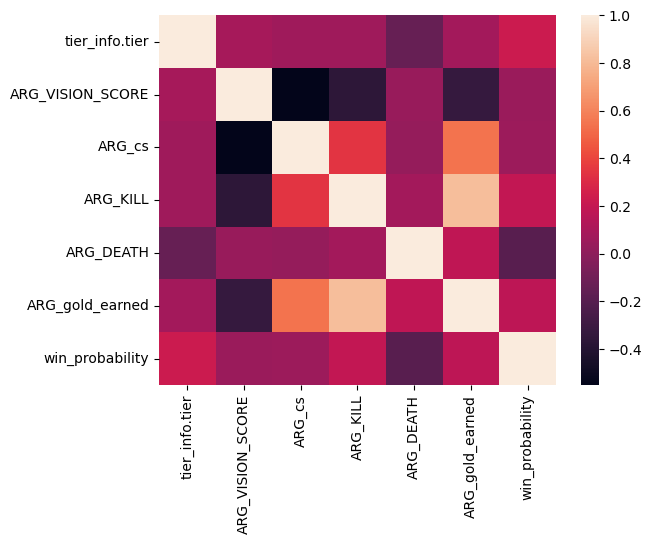

In [ ]:
sns.heatmap(final.corr(numeric_only=True))

<Axes: >

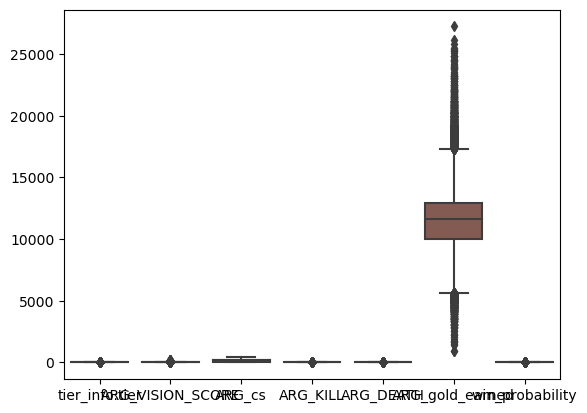

In [ ]:
sns.boxplot(final)

In [ ]:
#마스터와 챌린저
HIGH_RANKER = ((final['tier_info.tier']==7) | (final['tier_info.tier']==8)) & (final['queue_info.game_type']=='SOLORANKED')
HIGH_RANKERDF= final[HIGH_RANKER]

In [ ]:
#브론즈와 아이언
TRASH = ((final['tier_info.tier']==0) | (final['tier_info.tier']==1)) & (final['queue_info.game_type']=='SOLORANKED')
TrashDF= final[TRASH]

In [ ]:
TrashDF['tier_info.tier']

66467    1
66468    1
66469    1
66470    1
66471    1
        ..
88123    0
88124    0
88125    0
88126    0
88127    0
Name: tier_info.tier, Length: 20334, dtype: int64

In [ ]:
TrashDF.corr(numeric_only=True)

,tier_info.tier,ARG_VISION_SCORE,ARG_cs,ARG_KILL,ARG_DEATH,ARG_gold_earned,win_probability
tier_info.tier,1.000000,0.079219,0.066298,0.104020,-0.085912,0.123657,0.213968
ARG_VISION_SCORE,0.079219,1.000000,-0.499803,-0.291804,0.025571,-0.209807,0.073027
ARG_cs,0.066298,-0.499803,1.000000,0.374498,0.053767,0.551979,0.062120
ARG_KILL,0.104020,-0.291804,0.374498,1.000000,0.067583,0.813650,0.218263
ARG_DEATH,-0.085912,0.025571,0.053767,0.067583,1.000000,0.187141,-0.185661
ARG_gold_earned,0.123657,-0.209807,0.551979,0.813650,0.187141,1.000000,0.205375
win_probability,0.213968,0.073027,0.062120,0.218263,-0.185661,0.205375,1.000000


In [ ]:
HIGH_RANKERDF.corr(numeric_only=True)

,tier_info.tier,ARG_VISION_SCORE,ARG_cs,ARG_KILL,ARG_DEATH,ARG_gold_earned,win_probability
tier_info.tier,1.000000,0.077158,-0.102908,-0.054737,-0.127534,-0.090340,0.194807
ARG_VISION_SCORE,0.077158,1.000000,-0.599075,-0.584161,0.217336,-0.706038,0.036583
ARG_cs,-0.102908,-0.599075,1.000000,0.249120,-0.115359,0.539092,0.008270
ARG_KILL,-0.054737,-0.584161,0.249120,1.000000,-0.019653,0.850778,0.146919
ARG_DEATH,-0.127534,0.217336,-0.115359,-0.019653,1.000000,-0.039931,-0.103412
ARG_gold_earned,-0.090340,-0.706038,0.539092,0.850778,-0.039931,1.000000,0.080996
win_probability,0.194807,0.036583,0.008270,0.146919,-0.103412,0.080996,1.000000


[2] 피쳐 준비

## 상관관계를 통해 평균 CS와 평균 골드 획득량과 시야점수간의 관계를 파악할 수 있었습니다.

In [1203]:
#피쳐: CS,골드 획득량
#타겟: 시야점수
feature=final[['ARG_cs','ARG_gold_earned']]
target=final[['ARG_VISION_SCORE']]


In [1204]:
feature

,ARG_cs,ARG_gold_earned
0,196.0,10520.0
1,195.0,11536.0
2,202.0,13216.0
3,191.0,11960.0
4,189.0,11105.0
...,...,...
88123,81.0,8301.0
88124,38.0,6778.0
88125,34.0,5820.0
88126,9.0,5550.0


In [1205]:
# 피쳐와 타겟 개수 확인
print(f'feature_shape={feature.shape},feature_ndim={feature.ndim}')
print(f'feature_shape={target.shape},feature_ndim={target.ndim}')


feature_shape=(85486, 2),feature_ndim=2
feature_shape=(85486, 1),feature_ndim=2


In [1206]:
#from sklearn.preprocessing import RobustScaler

#scaler = RobustScaler()
#scaler.fit(feature)
#scaled_X_train = scaler.transform(feature, target)
#scaled_x_test = scaler.transform(feature_test, target_test)




In [1207]:
# 피쳐 정규화``
min_val = feature.min().values  # 최소값 계산
max_val = feature.max().values  # 최대값 계산
normalized_feature = ( feature- min_val) / (max_val - min_val)

In [1208]:
feature=normalized_feature

In [1209]:
class LOLDATASET(Dataset):
    #초기화 콜백 함수 만들기
    def __init__(self,x_data,y_data):
        super().__init__()
        #데이터=> nd.array화
        x_data=x_data.values if isinstance(x_data,pd.DataFrame) else x_data 
        y_data=y_data.values if isinstance(y_data,pd.DataFrame) else y_data 
        #ndarray=> tensor
        self.feature=torch.Tensor(x_data)
        self.target=torch.Tensor(y_data)
        #데이터 개수 체크 콜백함수
    def __len__(self):
            return self.target.shape[0]
        # 특정 인덱스 데이터+라벨 반환 콜백함수
    def __getitem__(self,index):
            return self.feature[index],self.target[index]
        

In [1210]:
### 전체 데이터셋 생성
##  DataSet 생성
all_dataset = LOLDATASET(feature,target)

print(f'[all dataset] feature : {all_dataset.feature.shape},   target : {all_dataset.target.shape}')


[all dataset] feature : torch.Size([85486, 2]),   target : torch.Size([85486, 1])


- [3-2] 학습용, 검증용, 테스트용 데이터셋 분리 

In [1211]:
from torch.utils.data import Dataset, DataLoader, random_split
# 랜덤 고정 설정
seed_gen=torch.Generator().manual_seed(30)
# 훈련,검증,테스트용 데이터셋
TRAIN_SIZE, VALID_SIZE, TEST_SIZE = 0.7, 0.1, 0.2

trainDS,validDS,testDS=random_split(all_dataset,[TRAIN_SIZE, VALID_SIZE, TEST_SIZE],generator=seed_gen)



print(len(trainDS)) #0.7
print(len(validDS)) #0.1
print(len(testDS)) #0.2

59841
8548
17097


[4] 데이터 로더 생성


In [1212]:
BATCH_SIZE = 500

TRAIN_DL = DataLoader(trainDS, batch_size=BATCH_SIZE)
VALID_DL = DataLoader(validDS, batch_size=BATCH_SIZE)
TEST_DL = DataLoader(testDS,   batch_size=BATCH_SIZE)

[5] 모델 준비 : 입력층 입력 수, 출력층 출력 수 <hr>

In [1213]:
class LOLModel(nn.Module):
    def __init__(self, in_dim, out_dim, n_nodes): #n_nodes=퍼셉트론 개수
        super().__init__()
        self.inlayer = nn.Linear(in_dim, n_nodes[0])
        self.linears = nn.ModuleList([nn.Linear(n_nodes[i], n_nodes[i+1]) for i in range(len(n_nodes)-1)])
        self.outlayer = nn.Linear(n_nodes[-1], out_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.inlayer(x))
        for layer in self.linears:
            x = self.relu(layer(x))
        x = self.outlayer(x)
        return x

In [1214]:
trainDS.dataset.feature.shape

torch.Size([85486, 2])

- [6-1] 학습 진행 준비 :  모델, 최적화, 학습횟수 

In [1215]:
# 실행 디바이스 
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# 입출력 피쳐
IN_DIM , OUT_DIM = trainDS.dataset.feature.shape[1], 1
print(IN_DIM)

# 모델 인스턴스 
MODEL =LOLModel(IN_DIM, OUT_DIM,n_nodes=[10,5]).to(DEVICE)
print(MODEL)

# 최적화 인스턴스 생성
OPTIMIZER = optim.SGD(MODEL.parameters())

#  손실 함수
LOSS_FN = nn.MSELoss().to(DEVICE)

# 학습 횟수 설정
EPOCHS=100


2
LOLModel(
  (inlayer): Linear(in_features=2, out_features=10, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=10, out_features=5, bias=True)
  )
  (outlayer): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)


[6-2] 학습 함수

In [1216]:
import torchmetrics.functional as metrics
from torchmetrics.regression import R2Score

In [1218]:
def training(epoch):
    
    MODEL.train()

    #리스트 만들기
    train_report=[[],[]]

    
    for idx,(feature,target) in enumerate(TRAIN_DL):
        #print(idx, feature.shape, target.shape)
        #배치 크기만큼 학습데이터 준비 #배치 크기=500
        feature, target =feature.to(DEVICE), target.to(DEVICE) #CPU에저장

        #학습
        pre_target=MODEL(feature)
        #print('pre :', pre_target.shape, 'target :', target.shape)


        #손실계산
        loss=LOSS_FN(pre_target,target) #예측치와 실제치의 오차손실 계산
        train_report[0].append(loss)
        #print('Loss :', loss)

        # #r2스코어
        r2=R2Score()(pre_target,target)
        train_report[1].append(r2)
        #print('r2 :', r2)

        #기울기(w),절편(b)
        OPTIMIZER.zero_grad()
        loss.backward()
        OPTIMIZER.step()

        if not idx%50:print('.',end='')  #50개 마다 점찍기
    
    # 에포크 단위 학습 진행 메시지 출력
    loss_score = (sum(train_report[0])/BATCH_SIZE).item()
    r2_score= (sum(train_report[1])/BATCH_SIZE).item()
    print(f'\n[{epoch} Train ] Loss ==> {loss_score:.4f} # mse ==> {loss_score:.4f} R2 ==> {r2_score:.4f}')
    
    return loss_score, r2_score
        

[6-3] 검증,테스팅 진행 함수

In [1220]:
def validation_testing(epoch,kind='valid'):
    MODEL.eval()
        
    with torch.no_grad():
        # 배치크기 만큼 학습 진행 및 저장
        test_report=[[], []]
        for idx, (feature, target)  in enumerate(VALID_DL if kind == 'valid' else TEST_DL):
            # 배치크기만큼의 학습 데이터 준비
            feature, target = feature.to(DEVICE), target.to(DEVICE)

            # 학습
            pre_target = MODEL(feature)

            #손실계산
            loss=LOSS_FN(pre_target,target) #예측치와 실제치의 오차손실 계산
            test_report[0].append(loss)   
            
            # #r2스코어
            r2=R2Score()(pre_target,target)
            test_report[1].append(r2)    

    testing_type = 'Valid' if kind == 'valid' else 'Test'
        
    # 에포크 단위 학습 진행 메시지 출력
    loss_score = (sum(test_report[0])/BATCH_SIZE).item()
    r2_score= (sum(test_report[1])/BATCH_SIZE).item()
    print(f'\n[{epoch} Test ] Loss ==> {loss_score:.4f} , R2 ==> {r2_score:.4f}')
    
    return loss_score, r2_score


In [1221]:
target.shape

(85486, 1)

[7] 학습 : 학습 진행 준비, 학습 진행 <hr>

- [7-2] 학습 진행

In [1222]:
### ===>지정된 횟수 만큼 처음부터~ 끝까지 학습 및 검증 진행
### ===>목표:최적(Error 최소화)의 W,b를 가진 모델 완성
### ===>
for ep in range(EPOCHS):
    training(ep)
    validation_testing(ep)


...
[0 Train ] Loss ==> 109.5832 # mse ==> 109.5832 R2 ==> -0.0733

[0 Test ] Loss ==> 10.0279 , R2 ==> 0.0084
...
[1 Train ] Loss ==> 57.2338 # mse ==> 57.2338 R2 ==> 0.0767

[1 Test ] Loss ==> 8.4913 , R2 ==> 0.0125
...
[2 Train ] Loss ==> 54.3524 # mse ==> 54.3524 R2 ==> 0.0849

[2 Test ] Loss ==> 8.3634 , R2 ==> 0.0128
...
[3 Train ] Loss ==> 53.7156 # mse ==> 53.7156 R2 ==> 0.0867

[3 Test ] Loss ==> 8.2878 , R2 ==> 0.0130
...
[4 Train ] Loss ==> 53.2857 # mse ==> 53.2857 R2 ==> 0.0879

[4 Test ] Loss ==> 8.2380 , R2 ==> 0.0131
...
[5 Train ] Loss ==> 52.9968 # mse ==> 52.9968 R2 ==> 0.0887

[5 Test ] Loss ==> 8.2066 , R2 ==> 0.0132
...
[6 Train ] Loss ==> 52.8044 # mse ==> 52.8044 R2 ==> 0.0893

[6 Test ] Loss ==> 8.1862 , R2 ==> 0.0132
...
[7 Train ] Loss ==> 52.6731 # mse ==> 52.6731 R2 ==> 0.0897

[7 Test ] Loss ==> 8.1729 , R2 ==> 0.0133
...
[8 Train ] Loss ==> 52.5779 # mse ==> 52.5779 R2 ==> 0.0899

[8 Test ] Loss ==> 8.1629 , R2 ==> 0.0133
...
[9 Train ] Loss ==> 52.5034 #

In [ ]:
train_ = {'loss':[], 'acc':[], 'f1':[]}
val_ = {'loss':[], 'acc':[], 'f1':[]}

- [7-3] 학습 후 평가 : Loss, mse,r2 <hr>

In [ ]:
for idx, key in enumerate(train_):
    print(f'{key} ', train_[key])

loss  []
acc  []
f1  []


(85486,)
